#  **Introdução**


Este projeto tem como objetivo a construção e implementação de um modelo de machine learning para previsão de dados, utilizando o algoritmo Random Forest Regressor. O modelo é treinado a partir de um conjunto de dados contendo variáveis relevantes para a predição, garantindo um processo robusto de aprendizado e análise.

O fluxo do projeto abrange todas as etapas essenciais para a criação de um modelo preditivo *eficiente*, incluindo:


Avaliação do desempenho: São utilizadas métricas como **Erro Absoluto Médio (MAE)** e **Erro Quadrático Médio (MSE)** para validar a precisão do modelo.
Salvamento do modelo: O modelo treinado é armazenado para possibilitar previsões futuras com novos dados.

#  **Etapas do Projeto**

1.   Coleta e preparação dos dados: Os dados são obtidos de um repositório online e passam por um processo de limpeza e normalização para garantir sua qualidade.
2.   Divisão entre treino e teste: O conjunto de dados é separado para permitir a avaliação do desempenho do modelo.
3. Treinamento do modelo: O Random Forest Regressor é treinado para aprender padrões e relações entre as variáveis preditoras e o alvo.
4. Avaliação do desempenho: São utilizadas métricas como Erro Absoluto Médio (MAE) e Erro Quadrático Médio (MSE) para validar a precisão do modelo.
5. Salvamento do modelo: O modelo treinado é armazenado para possibilitar previsões futuras com novos dados.


# Notebook de Machine Learning - Previsão com Random Forest

## Passo 1: Configurações Iniciais

### Importar Bibliotecas

In [30]:
# Bibliotecas Padrão do Python
import requests

# Bibliotecas para Manipulação de Dados
import pandas as pd
import numpy as np

# Bibliotecas para Visualização
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go

# Bibliotecas para Machine Learning
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Biblioteca para Salvamento do Modelo
import joblib

### Configurar exibição do pandas

In [31]:
pd.options.display.max_columns = None
pd.options.display.float_format = "{:,.6f}".format

## Passo 2: Coletar os Dados


### Download do arquivo .csv

In [32]:
%%capture
!wget "https://raw.githubusercontent.com/maiagia/modelo_b3/main/arquivos/massadados_comtarget.csv"

### Carregar dados no DataFrame

In [33]:
# Lê o arquivo CSV baixado e armazena os dados em um DataFrame
vBase = pd.read_csv("massadados_comtarget.csv")

## Passo 3: Explorar os Dados

### Visualizar base

In [34]:
vBase.head(4)

,QTD_TEORICA,QTD_TEORICA_TOTAL,QTD_REDUTOR,VAL_PARTICIPACAO_ACUMULADA_SETOR,VAL_PARTICIPACAO_SETOR
0,"1,243,177,587.000000","98,454,079,581.000000","16,161,527.116453",2.979000,2.979000
1,"734,631,801.000000","98,454,079,581.000000","16,161,527.116453",3.051000,2.802000
2,"666,378,439.000000","98,454,079,581.000000","16,161,527.116453",3.051000,0.249000
3,"326,872,005.000000","98,454,079,581.000000","16,161,527.116453",2.292000,0.063000


### Informações

In [35]:
vBase.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 348 entries, 0 to 347
Data columns (total 5 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   QTD_TEORICA                       348 non-null    float64
 1   QTD_TEORICA_TOTAL                 348 non-null    float64
 2   QTD_REDUTOR                       348 non-null    float64
 3   VAL_PARTICIPACAO_ACUMULADA_SETOR  348 non-null    float64
 4   VAL_PARTICIPACAO_SETOR            348 non-null    float64
dtypes: float64(5)
memory usage: 13.7 KB


### Estatística Descritiva

In [36]:
vBase.describe().T

,count,mean,std,min,25%,50%,75%,max
QTD_TEORICA,348.000000,"1,131,656,087.137931","1,319,545,673.331330","81,838,243.000000","326,175,300.000000","649,238,303.000000","1,243,177,587.000000","5,857,796,242.000000"
QTD_TEORICA_TOTAL,348.000000,"98,454,079,581.000000",0.000000,"98,454,079,581.000000","98,454,079,581.000000","98,454,079,581.000000","98,454,079,581.000000","98,454,079,581.000000"
QTD_REDUTOR,348.000000,"16,161,527.116453",0.000000,"16,161,527.116453","16,161,527.116453","16,161,527.116453","16,161,527.116453","16,161,527.116453"
VAL_PARTICIPACAO_ACUMULADA_SETOR,348.000000,6.092839,6.273702,0.006000,1.519000,2.511000,11.629000,18.045000
VAL_PARTICIPACAO_SETOR,348.000000,1.149425,1.842747,0.006000,0.193000,0.466000,1.154000,11.939000


### Pairplot

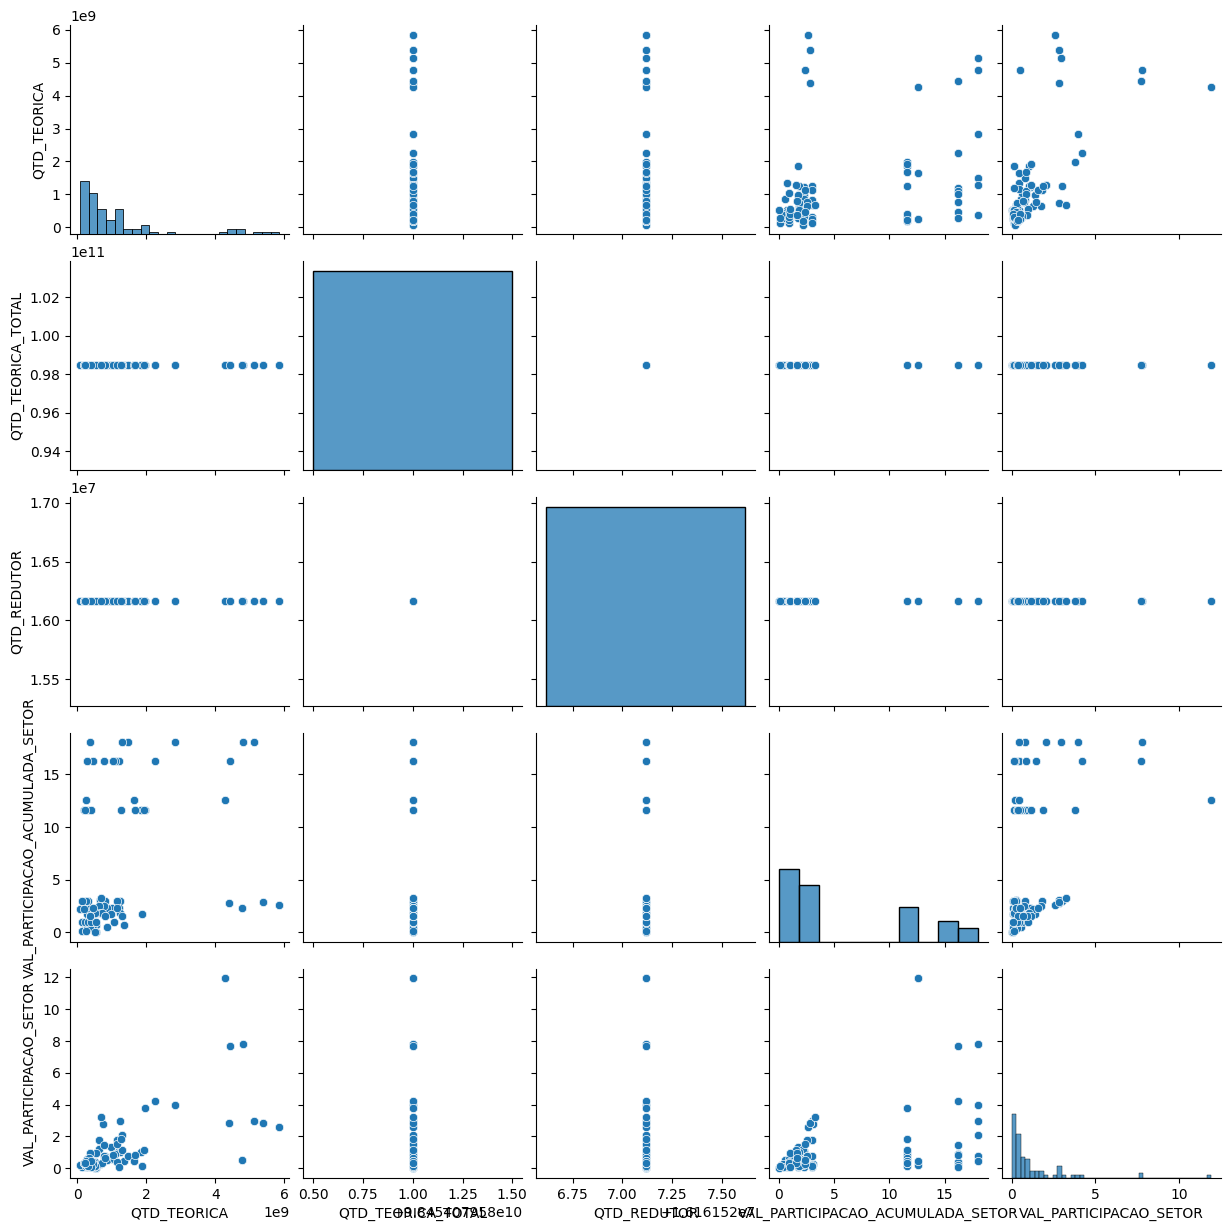

In [37]:
%matplotlib inline
sns.pairplot(vBase)
plt.show()

## Passo 4: Pré-processamento

### Normalização dos dados

In [38]:
# Criando cópia do DataFrame
vBase_PreProcessada = vBase.copy()

# Criando o normalizador e ajustando em todas as amostras **antes da divisão**
scaler = StandardScaler()
vBase_PreProcessada[['QTD_TEORICA', 'QTD_TEORICA_TOTAL', 'QTD_REDUTOR', 'VAL_PARTICIPACAO_ACUMULADA_SETOR']] = scaler.fit_transform(
    vBase_PreProcessada[['QTD_TEORICA', 'QTD_TEORICA_TOTAL', 'QTD_REDUTOR', 'VAL_PARTICIPACAO_ACUMULADA_SETOR']]
)

joblib.dump(scaler, "scaler_b3.pkl")

vBase_PreProcessada.head(3)

,QTD_TEORICA,QTD_TEORICA_TOTAL,QTD_REDUTOR,VAL_PARTICIPACAO_ACUMULADA_SETOR,VAL_PARTICIPACAO_SETOR
0,0.084637,0.000000,0.000000,-0.497047,2.979000
1,-0.301313,0.000000,0.000000,-0.485554,2.802000
2,-0.353112,0.000000,0.000000,-0.485554,0.249000


## Passo 5: Separar as Variáveis para Treinamento
Realiza o pré-processamento dos dados, incluindo a seleção de features, normalização e divisão entre conjunto de treino e teste para um modelo de machine learning.

### Separar features e target

In [39]:
vFeatures = vBase_PreProcessada[['QTD_TEORICA', 'QTD_TEORICA_TOTAL', 'QTD_REDUTOR', 'VAL_PARTICIPACAO_ACUMULADA_SETOR']]
vTarget = vBase_PreProcessada['VAL_PARTICIPACAO_SETOR']

### Separar features e target de treino e teste

In [40]:
# Divisão dos dados em treino (80%) e teste (20%)
vFeatures_Treino, vFeatures_Teste, vTarget_Treino, vTarget_Teste = train_test_split(vFeatures, vTarget, test_size=0.2, random_state=42)

# Exibe o tamanho dos conjuntos gerados
print(f"Tamanho do treino: {vFeatures_Treino.shape}\nTamanho do teste: {vFeatures_Teste.shape}")


Tamanho do treino: (278, 4)
Tamanho do teste: (70, 4)


## Passo 6: Treinar o Modelo
Cria, treina e ajusta um modelo de regressão usando RandomForestRegressor, um algoritmo de aprendizado de máquina baseado em múltiplas árvores de decisão.

In [41]:
# Criação do modelo RandomForestRegressor
vModelo_RandomForestRegressor = RandomForestRegressor(n_estimators=100, random_state=42)

# Treinamento do modelo com os dados de treino
vModelo_RandomForestRegressor.fit(vFeatures_Treino, vTarget_Treino)

RandomForestRegressor(random_state=42)

## Passo 7: Avaliar o Modelo
Avalia o desempenho do modelo treinado, gerando previsões sobre os dados de teste e calculando métricas de erro para medir sua precisão.

### Predição com a base de teste

In [42]:
vPredicao = vModelo_RandomForestRegressor.predict(vFeatures_Teste)

### Calcular métricas

In [43]:
vMetrica_MAE = mean_absolute_error(vTarget_Teste, vPredicao) # Erro absoluto médio
vMetrica_MSE = mean_squared_error(vTarget_Teste, vPredicao) # Erro quadrático médio
vMetrica_RMSE = np.sqrt(vMetrica_MSE) # Raiz do erro quadrático médio

print(f"MAE: {vMetrica_MAE}")
print(f"MSE: {vMetrica_MSE}")
print(f"RMSE: {vMetrica_RMSE}")

MAE: 0.041729142857143034
MSE: 0.010124553925714397
RMSE: 0.10062084240213057


### Previsões geradas (Exibindo as 10 primeiras)

In [44]:
vPredicao[:10]


array([ 0.60524,  0.23706,  0.35478,  0.79442,  0.55072,  3.9818 ,
        0.10512, 11.20416,  0.07109,  1.1549 ])

## Passo 8: Salvar o Modelo
Salva o modelo treinado em um arquivo para que possa ser reutilizado posteriormente sem necessidade de um novo treinamento.

In [45]:
%%capture
joblib.dump(vModelo_RandomForestRegressor, "modelo_b3.pkl")

## Passo 9: Fazer uma Previsão
Cria um conjunto de novos dados e usa o modelo treinado para fazer previsões sobre eles.

### Download de um novo arquivo

In [46]:
%%capture
!wget "https://raw.githubusercontent.com/maiagia/modelo_b3/main/arquivos/massadedados_semtarget.csv"

### Carregar dados em um DataFrame

In [47]:
vBase_NovoArquivo = pd.read_csv("massadedados_semtarget.csv")

### Pré-processar dados

In [48]:
vBase_NovoArquivo_PreProcessada = vBase_NovoArquivo.copy()
vBase_NovoArquivo_PreProcessada[['QTD_TEORICA', 'QTD_TEORICA_TOTAL', 'QTD_REDUTOR','VAL_PARTICIPACAO_ACUMULADA_SETOR']] = StandardScaler().fit_transform(vBase_NovoArquivo_PreProcessada[['QTD_TEORICA', 'QTD_TEORICA_TOTAL', 'QTD_REDUTOR','VAL_PARTICIPACAO_ACUMULADA_SETOR']])

vBase_NovoArquivo_PreProcessada.head(3)

,QTD_TEORICA,QTD_TEORICA_TOTAL,QTD_REDUTOR,VAL_PARTICIPACAO_ACUMULADA_SETOR
0,0.084637,0.000000,0.000000,-0.497047
1,-0.301313,0.000000,0.000000,-0.485554
2,-0.353112,0.000000,0.000000,-0.485554


### Carregar modelo

In [49]:
vModelo = joblib.load("modelo_b3.pkl")

### Fazer previsões

In [50]:
vBase_NovoArquivo_PreProcessada['PREVISAO'] = vModelo.predict(vBase_NovoArquivo_PreProcessada)

vBase_NovoArquivo_PreProcessada.head(3)

,QTD_TEORICA,QTD_TEORICA_TOTAL,QTD_REDUTOR,VAL_PARTICIPACAO_ACUMULADA_SETOR,PREVISAO
0,0.084637,0.000000,0.000000,-0.497047,2.979000
1,-0.301313,0.000000,0.000000,-0.485554,2.786110
2,-0.353112,0.000000,0.000000,-0.485554,0.364110


### Passo 10: Dashboard Interativo

Garantia de Dados Normalizados Antes da Previsão

In [51]:
# Garantir que os dados normalizados existem antes de prever
if 'QTD_TEORICA' not in vBase_NovoArquivo.columns:
    raise ValueError("Os dados necessários para normalização não estão disponíveis.")

Aplicação da Normalização

In [52]:
# Aplicando a normalização corretamente
scaler_carregado = joblib.load("scaler_b3.pkl")
vBase_NovoArquivo_Normalizado = scaler_carregado.transform(
    vBase_NovoArquivo[['QTD_TEORICA', 'QTD_TEORICA_TOTAL', 'QTD_REDUTOR', 'VAL_PARTICIPACAO_ACUMULADA_SETOR']]
)

Fazer Previsões e Criar DataFrame de Visualização

In [53]:
# Fazer previsões e adicionar ao DataFrame
vBase_NovoArquivo['PREVISAO'] = vModelo.predict(pd.DataFrame(vBase_NovoArquivo_Normalizado, columns=vFeatures.columns))

# Criando um DataFrame para visualização interativa
df_visualizacao = vBase_NovoArquivo[['QTD_TEORICA', 'PREVISAO']].copy()
df_visualizacao['Indice'] = vBase_NovoArquivo.index

Gráfico de dispersão "Quantidade Teórica" e "Previsão"

In [54]:
# Criando gráfico de dispersão interativo
fig1 = px.scatter(df_visualizacao, x='QTD_TEORICA', y='PREVISAO',
                  title="Correlação entre Quantidade Teórica e Previsão",
                  labels={'QTD_TEORICA': 'Quantidade Teórica', 'PREVISAO': 'Valor Previsto'},
                  hover_data=['QTD_TEORICA', 'PREVISAO'],
                  template="plotly_dark")

Gráfico de Linha "evolução das previsões"

In [55]:
# Criando gráfico de linha interativo
fig2 = px.line(df_visualizacao, x='Indice', y='PREVISAO',
               title="Evolução das Previsões do Modelo",
               labels={'Indice': 'Índice dos Dados', 'PREVISAO': 'Valor Previsto'},
               template="plotly_dark")

In [56]:
# 🔹 Exibir os gráficos diretamente no notebook
fig1.show()
fig2.show()

# **Conclusão sobre o Modelo**

O modelo apresenta um bom desempenho considerando a natureza dos dados, que possuem uma distribuição com valores relativamente próximos.

Os resultados das métricas de erro são baixos, com um MAE de 0.0417, indicando que, em média, as previsões estão muito próximas dos valores reais. Além disso, o MSE de 0.0101 e o RMSE de 0.1006 demonstram que o modelo tem uma boa capacidade de aprendizado sobre os padrões dos dados, reduzindo erros quadráticos e mantendo estabilidade nas previsões.

A análise gráfica mostra que o modelo conseguiu capturar tendências recorrentes dentro do conjunto analisado, com previsões estáveis e coerentes com a estrutura da base. Isso reforça sua consistência e confiabilidade para cenários com características semelhantes, tornando-o uma ferramenta eficaz para tomada de decisão baseada em dados.**